In [13]:
#step 1:Import neccessary libarary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
#step 2:Read Dataset
df=pd.read_csv("https://raw.githubusercontent.com/Dilum-Alahakoon/AIML-Project/refs/heads/main/results/outputs/Final_processed_dataset.csv")
print(df.head())
print(df.tail)

        Age  Hours_Per_Week  Mental_Health_Status Burnout_Level  \
0 -1.332006        1.590431                     5          High   
1 -0.539837       -1.442832                     5          High   
2 -0.935922       -1.555175                     0          High   
3 -0.302187        1.478088                     0        Medium   
4  0.648416        1.253402                     2        Medium   

   Work_Life_Balance_Score  Social_Isolation_Score  Average_Salary  \
0                        3                       2       -1.522323   
1                        4                       2        0.388838   
2                        3                       2        0.388838   
3                        1                       2       -0.566742   
4                        4                       3       -0.566742   

   Physical_Issue_Count  Physical_Health_Issues_Back Pain  \
0                     2                               0.0   
1                     1                               

In [15]:
# Checking for missing values
missing_sum = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_sum,
    'Percentage (%)': missing_percent
})
print("Missing Values Information:")
missing_info[missing_info['Missing Values'] > 0]

Missing Values Information:


,Missing Values,Percentage (%)


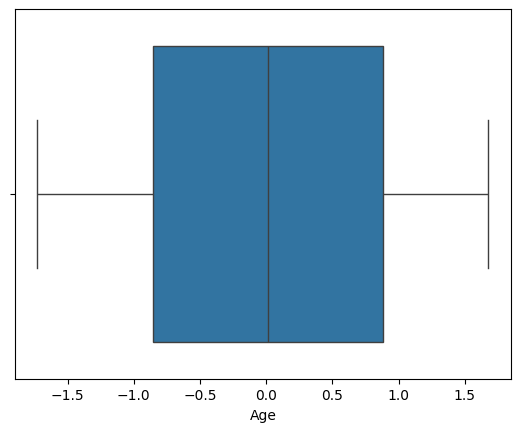

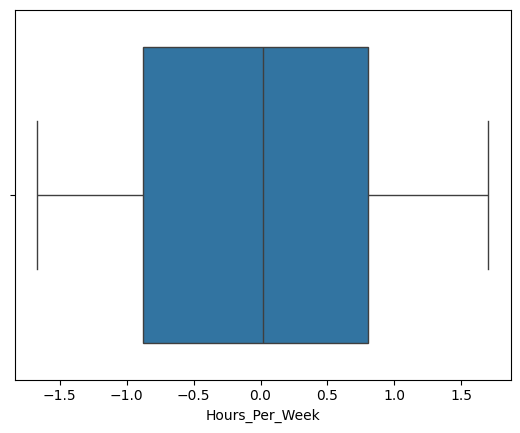

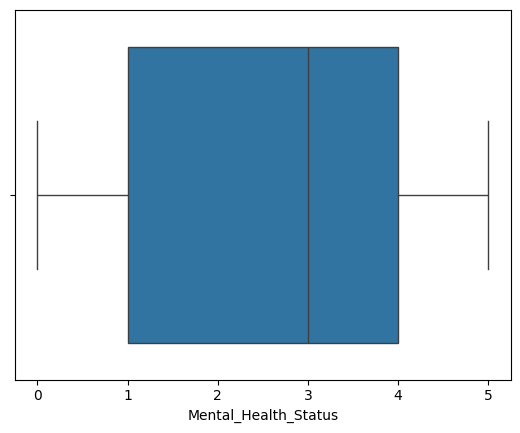

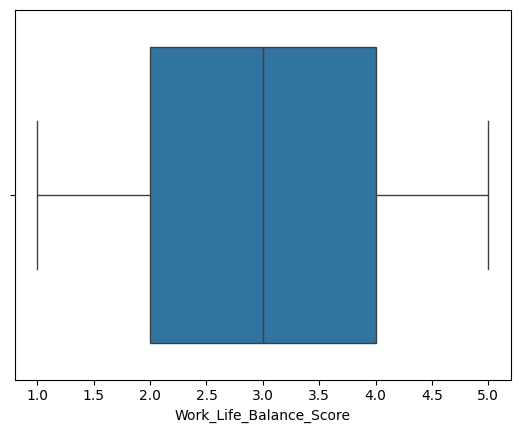

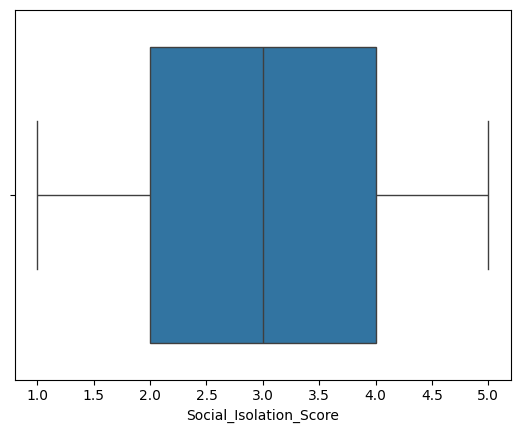

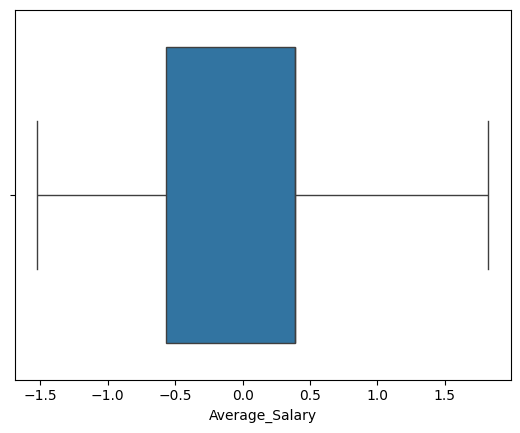

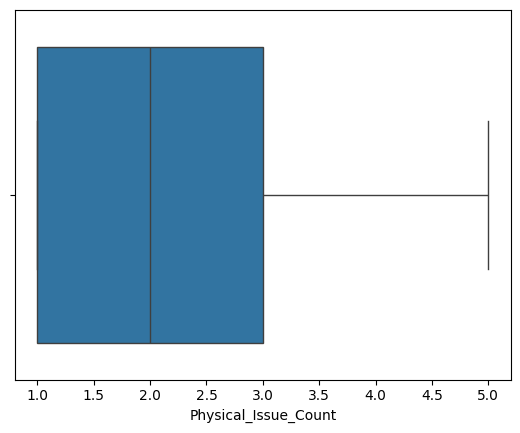

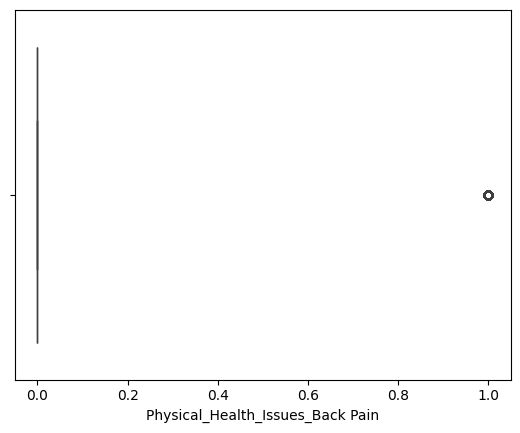

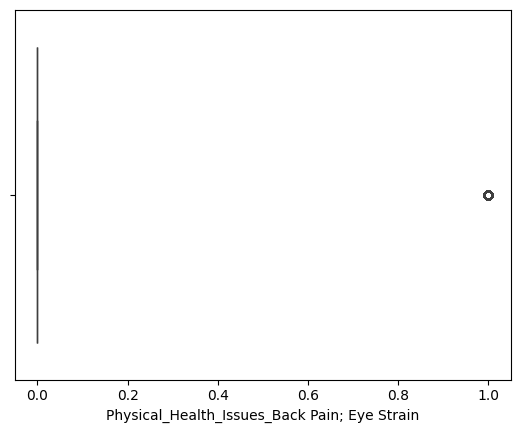

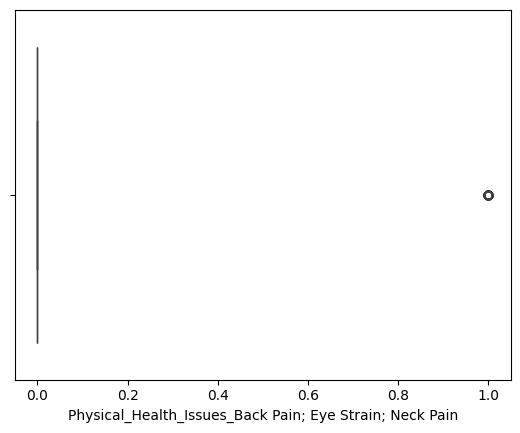

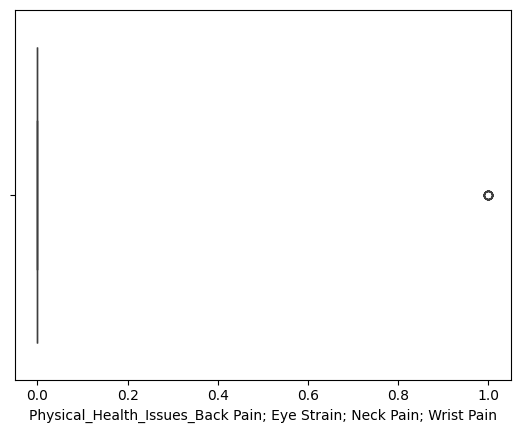

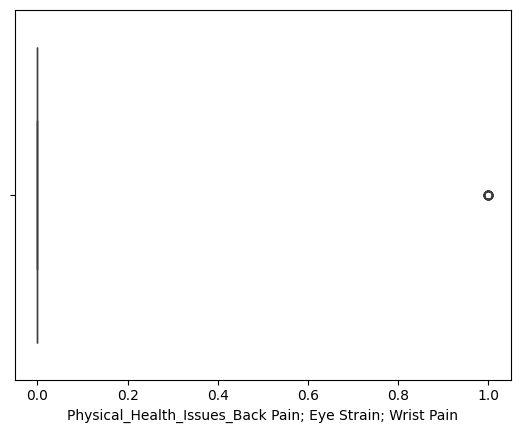

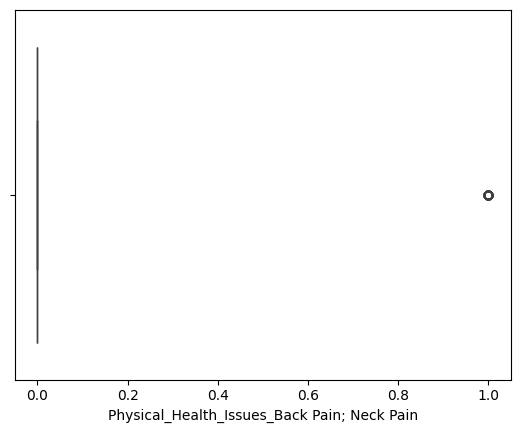

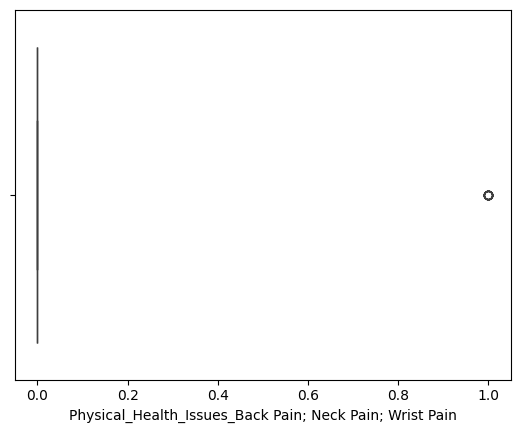

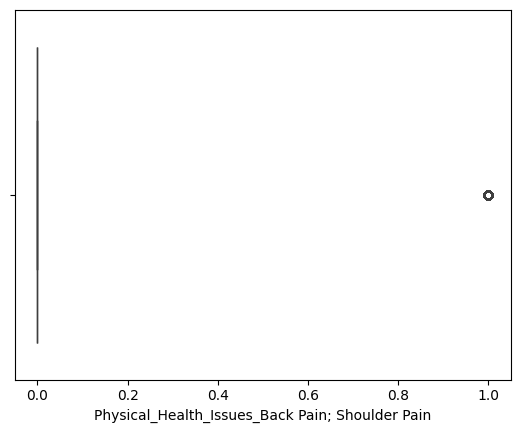

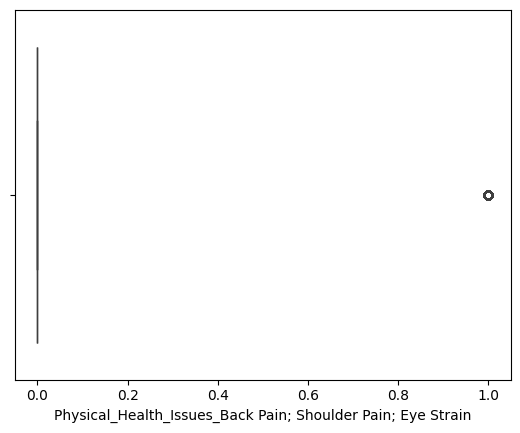

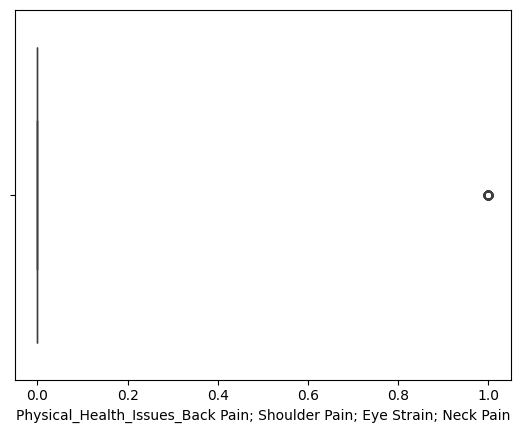

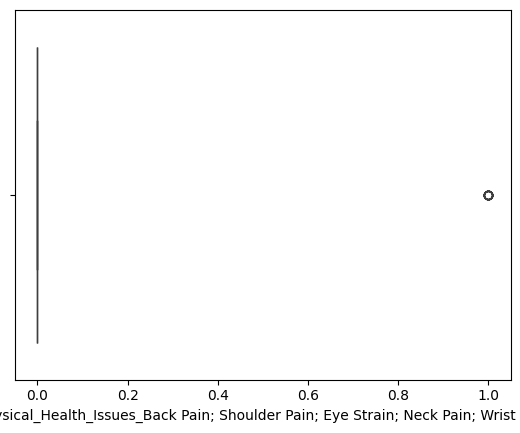

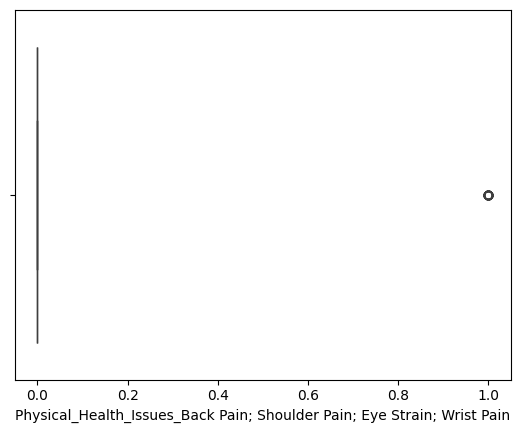

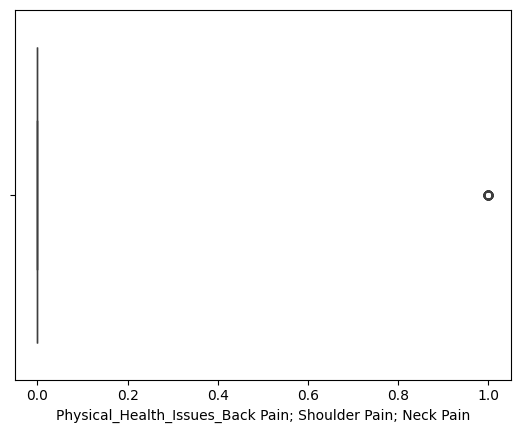

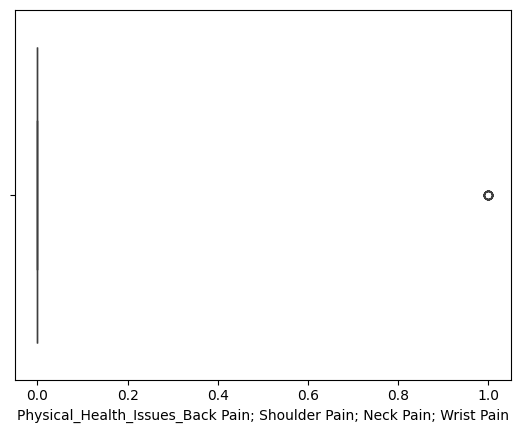

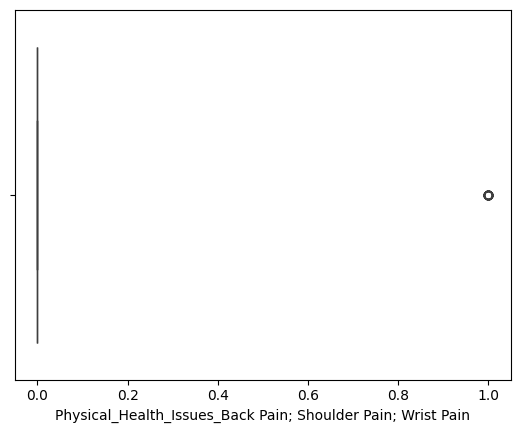

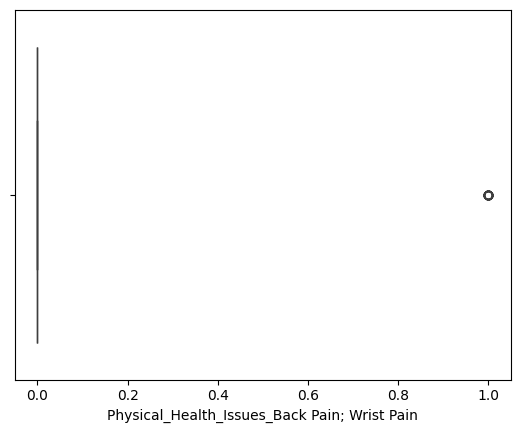

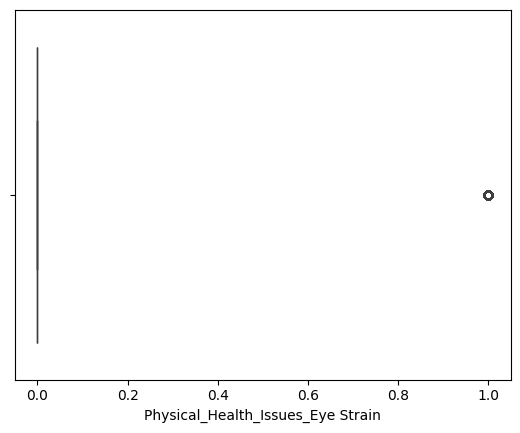

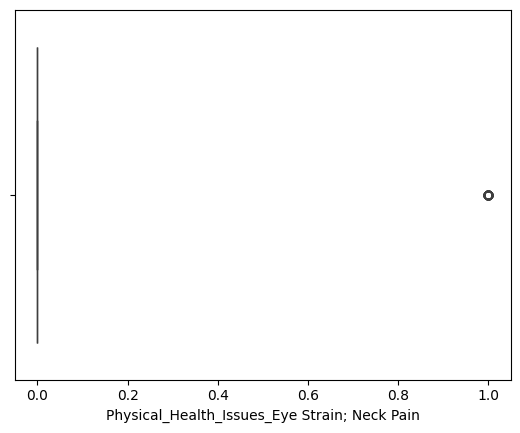

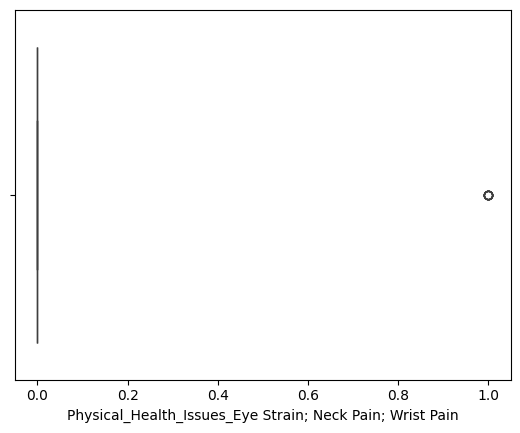

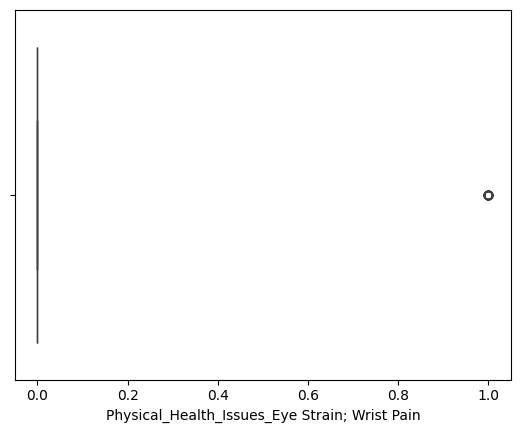

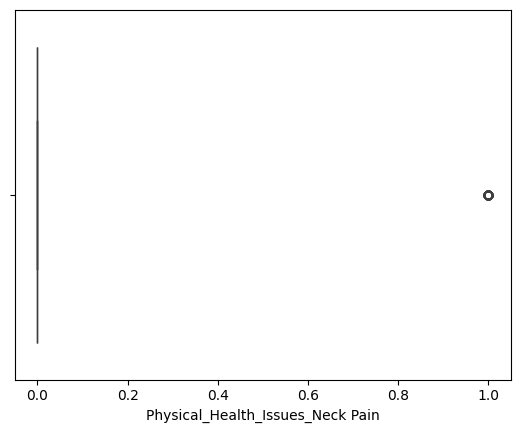

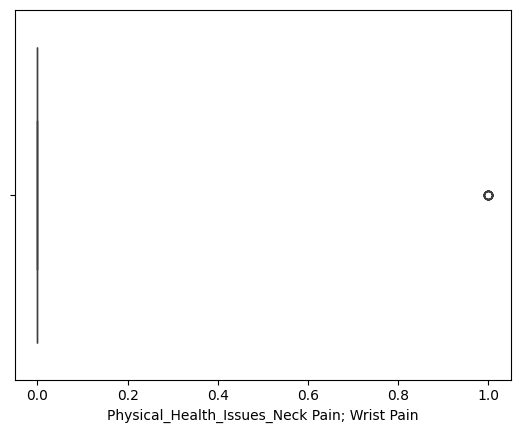

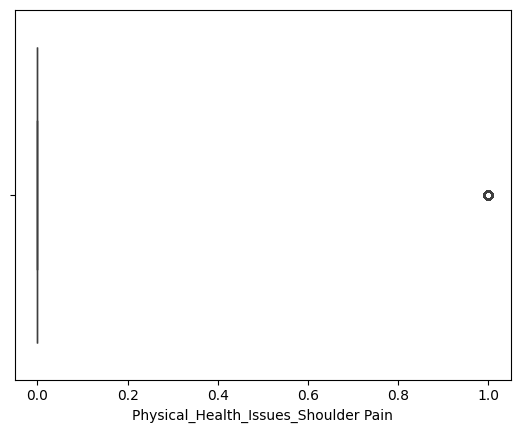

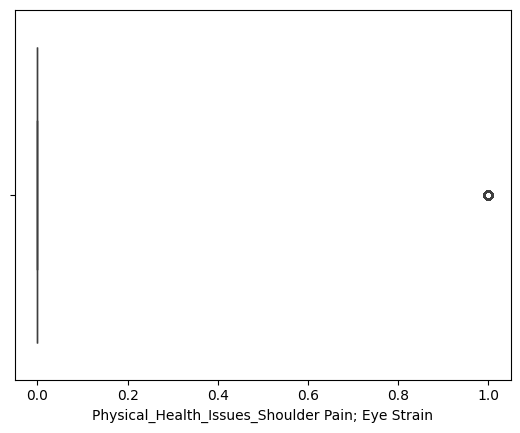

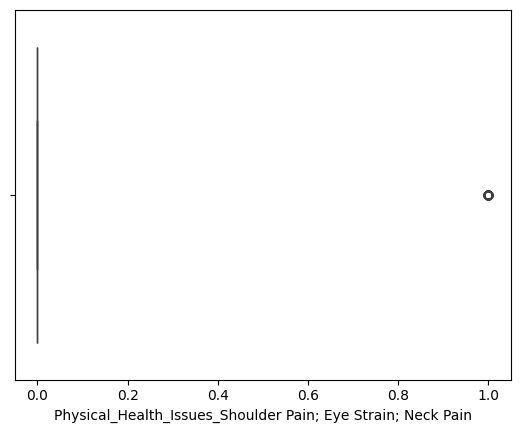

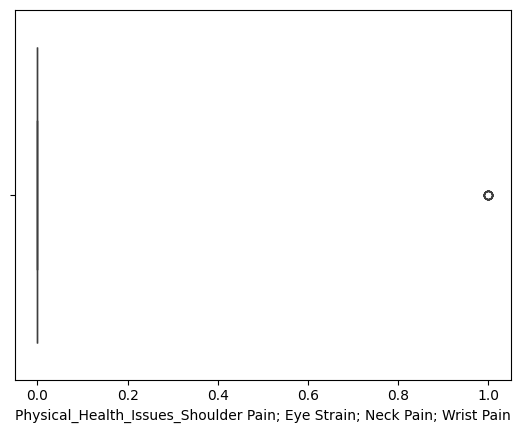

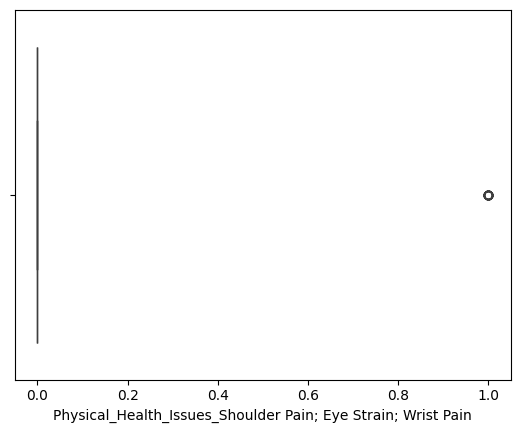

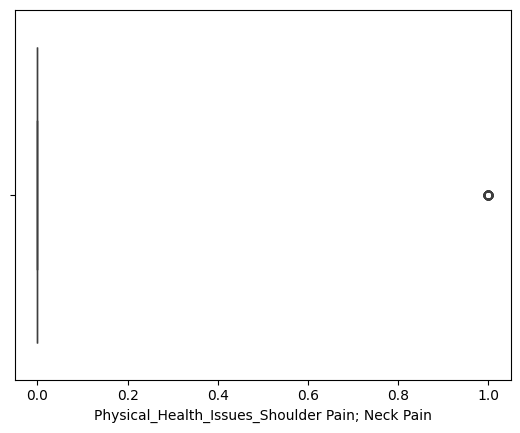

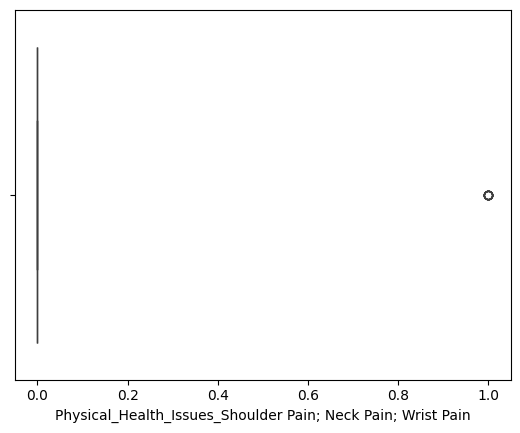

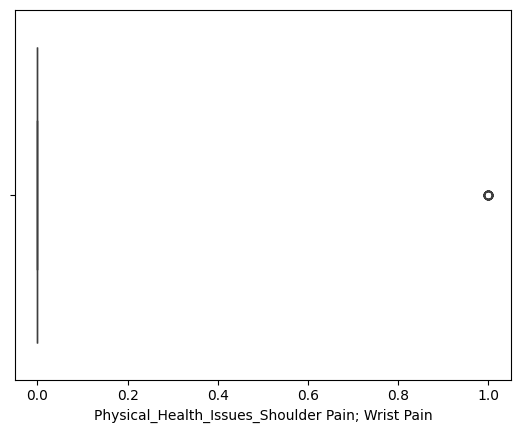

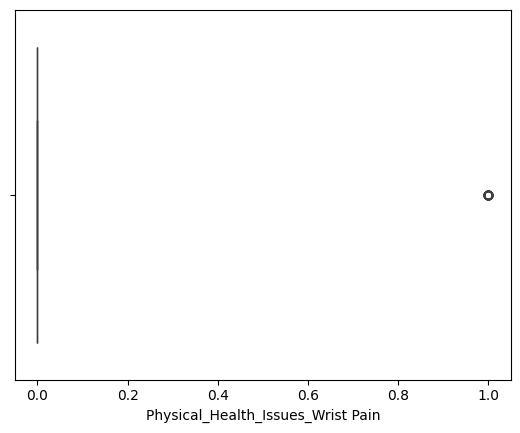

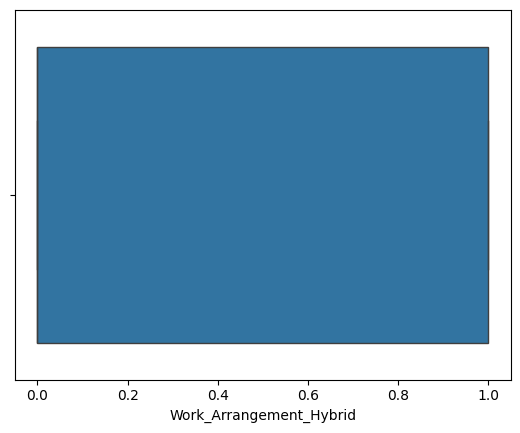

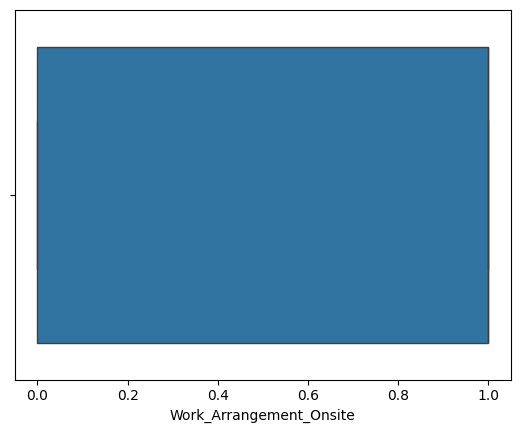

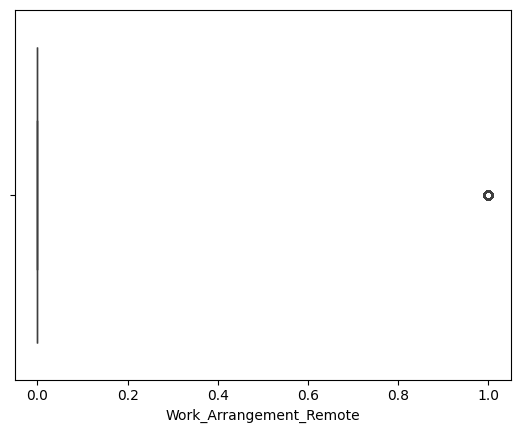

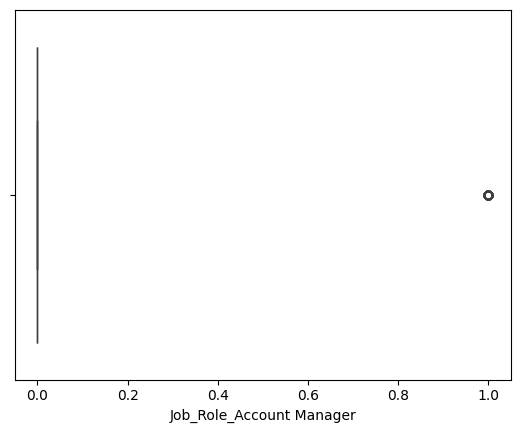

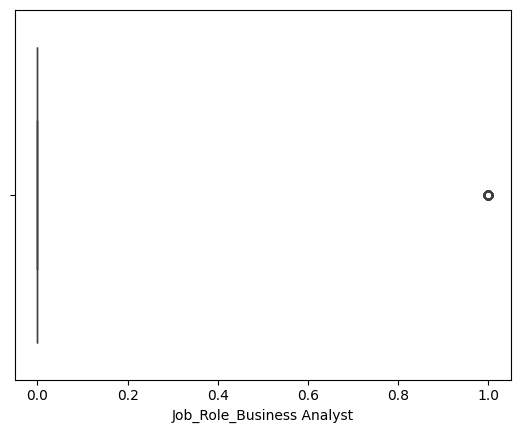

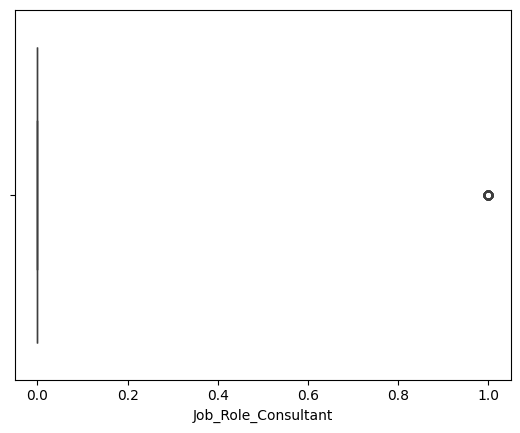

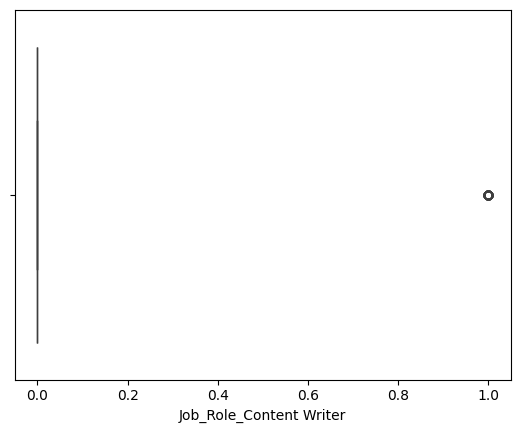

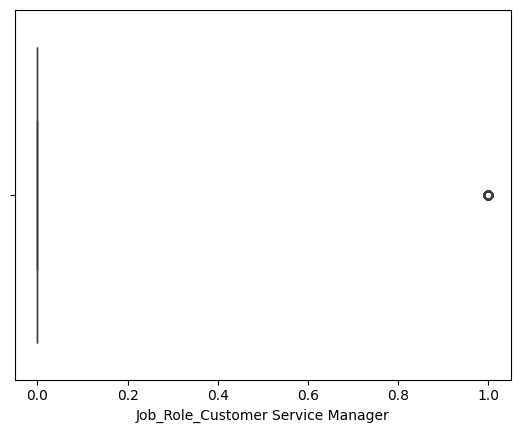

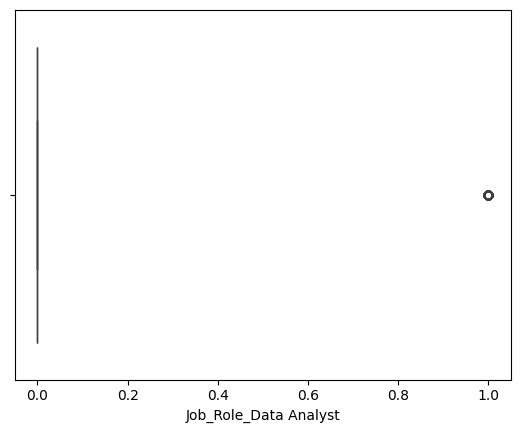

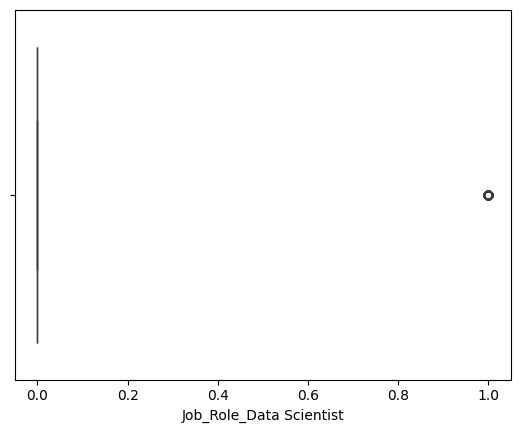

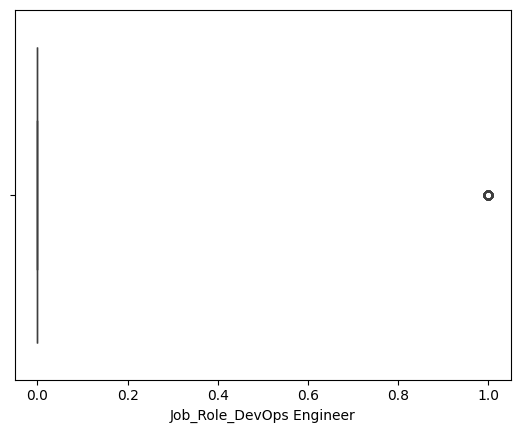

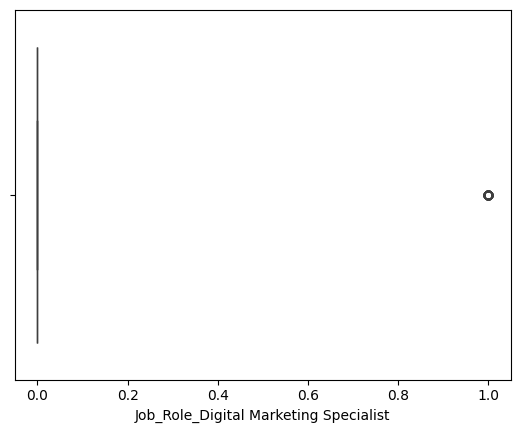

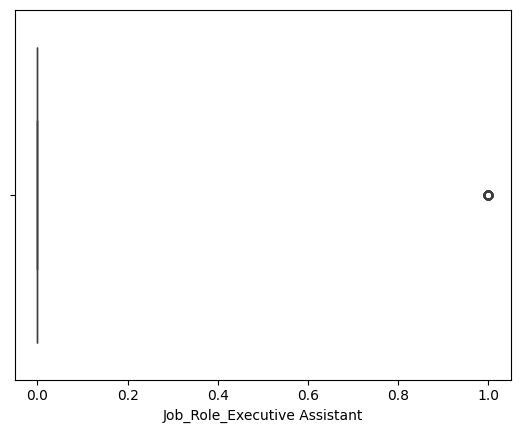

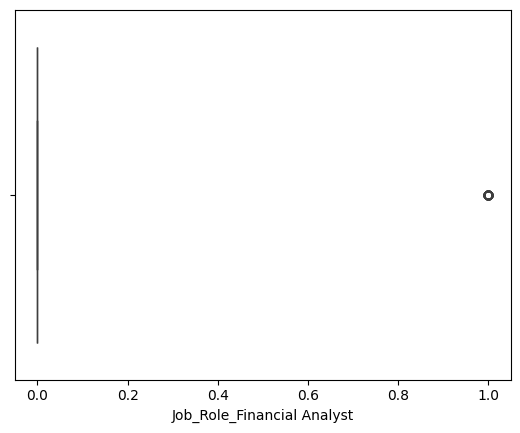

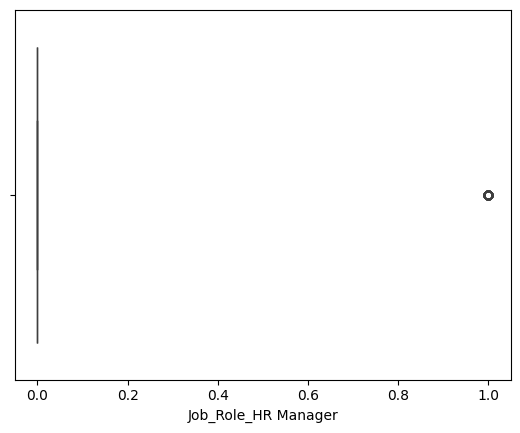

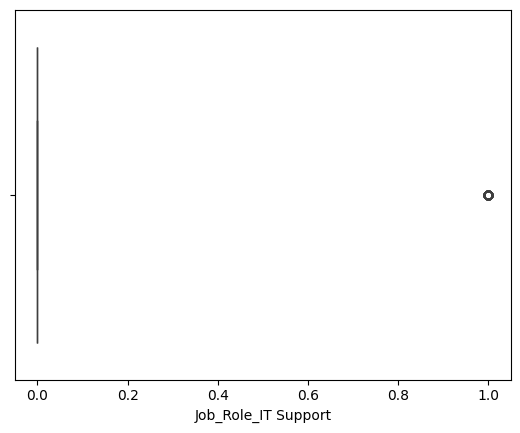

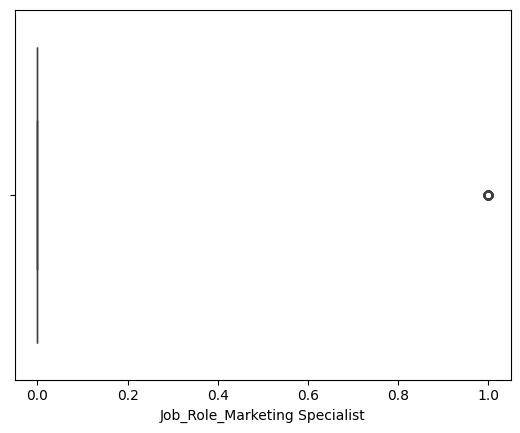

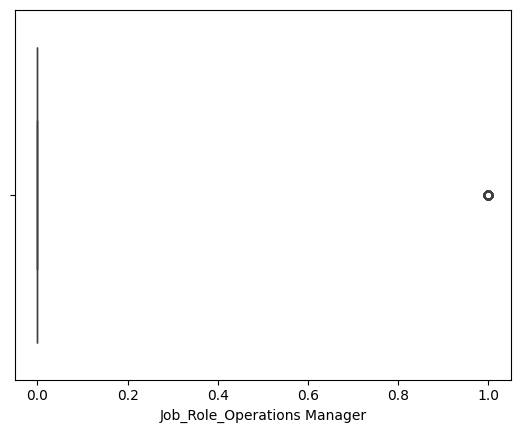

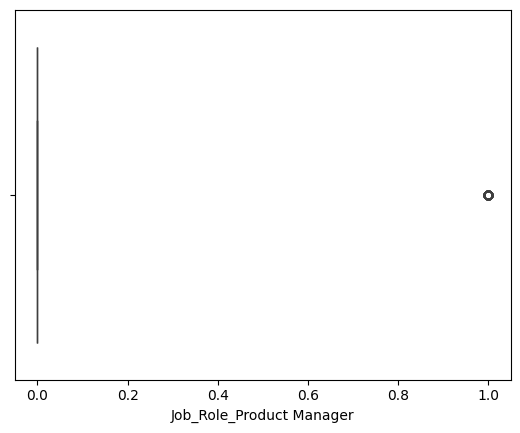

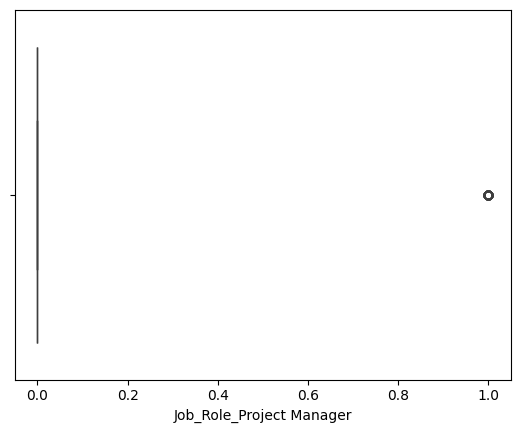

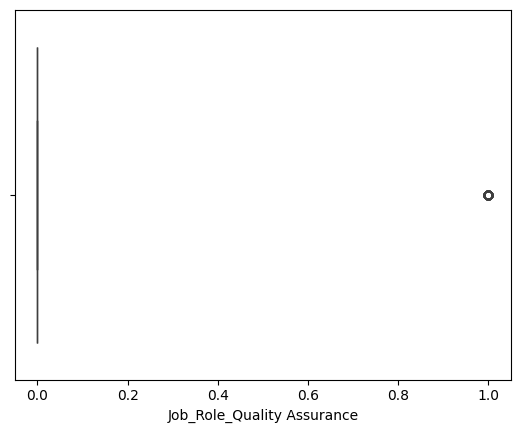

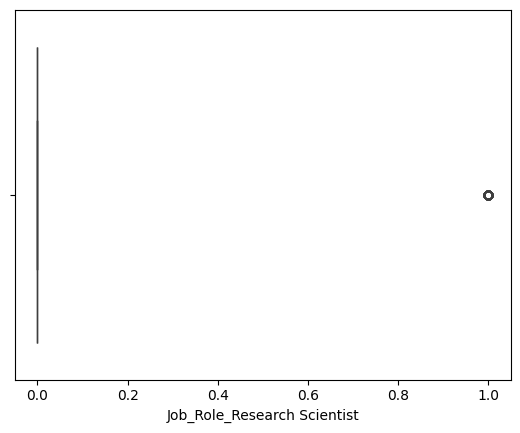

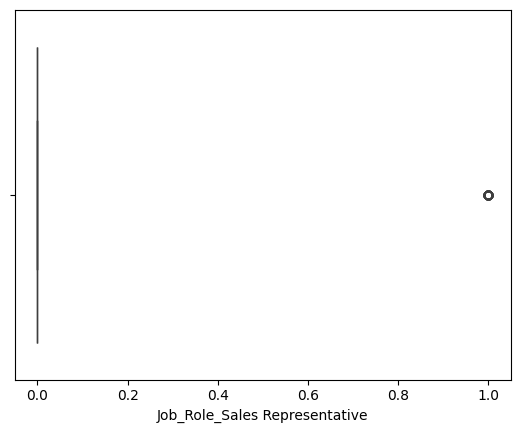

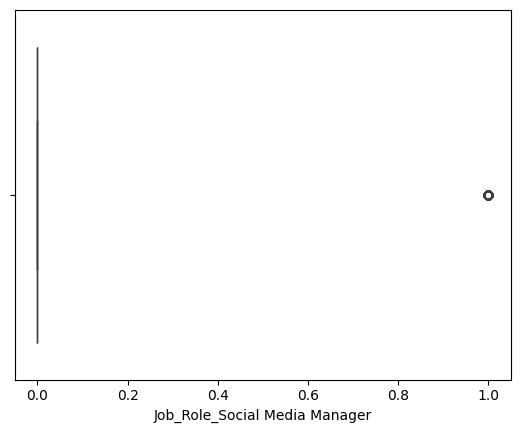

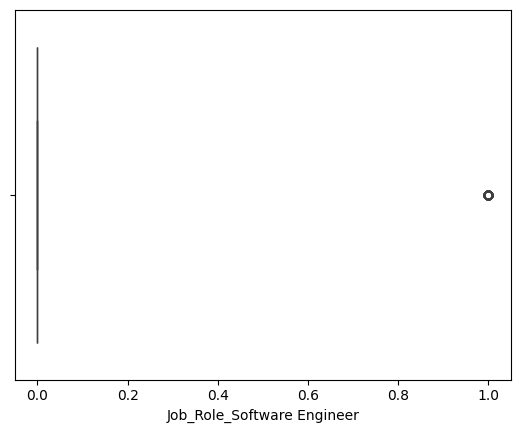

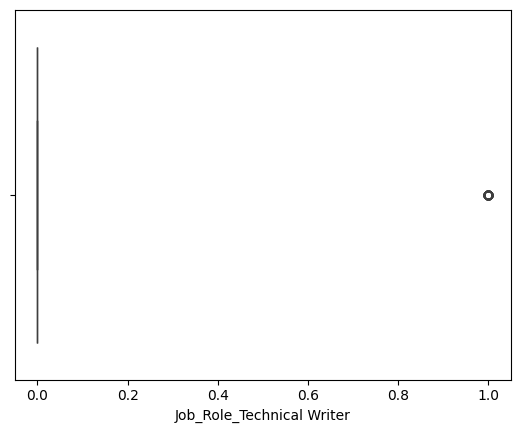

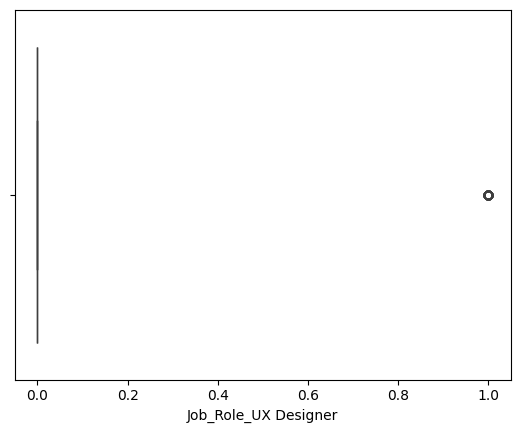

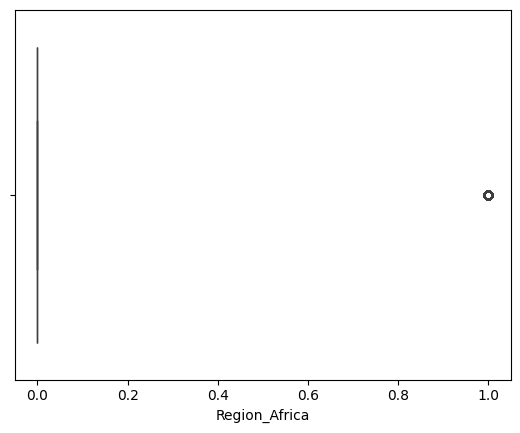

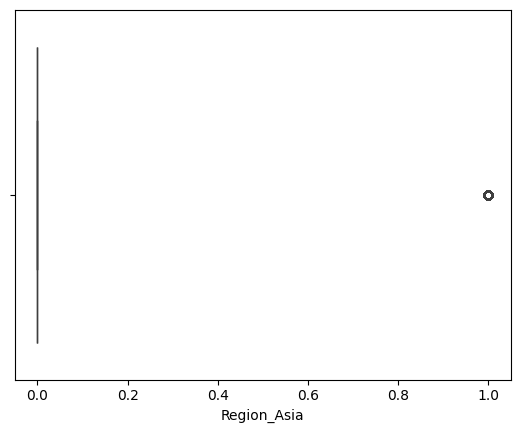

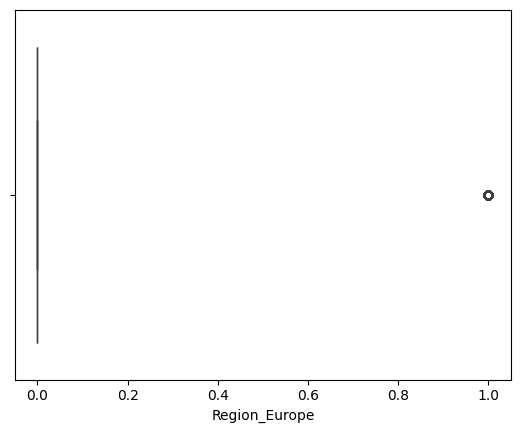

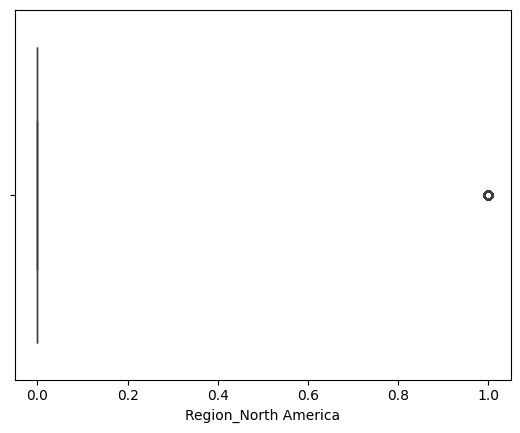

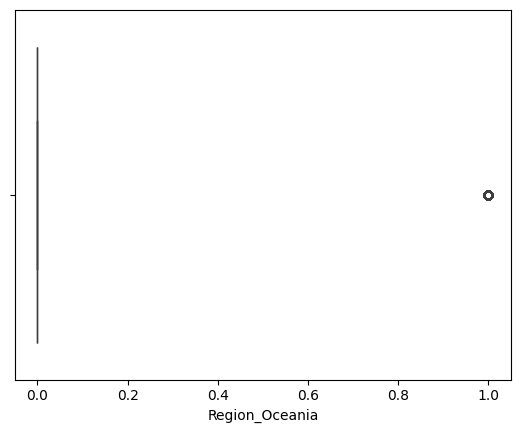

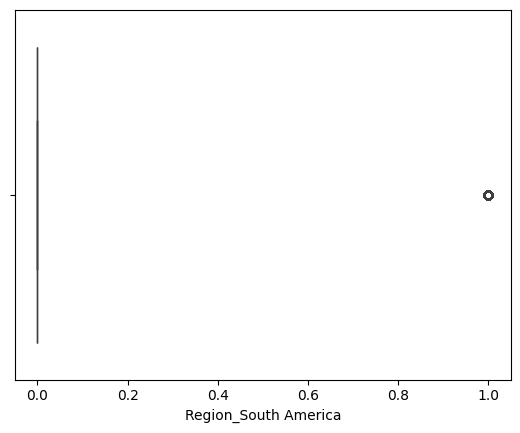

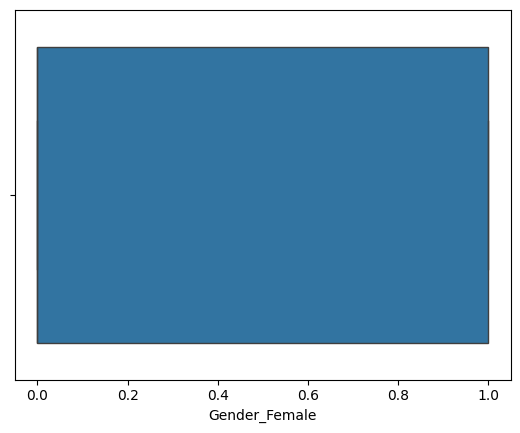

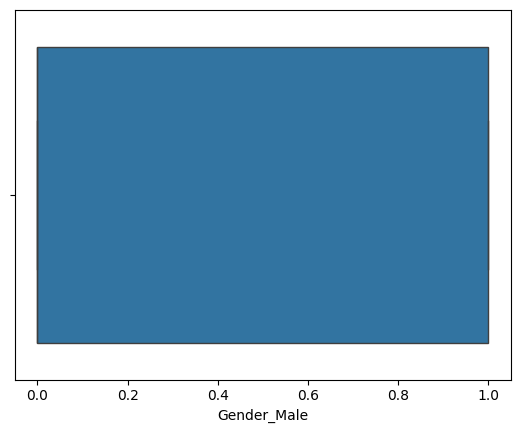

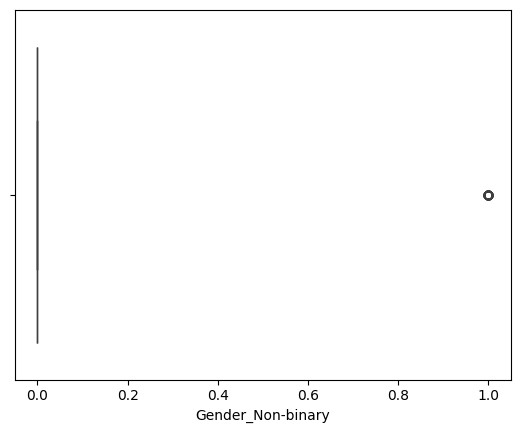

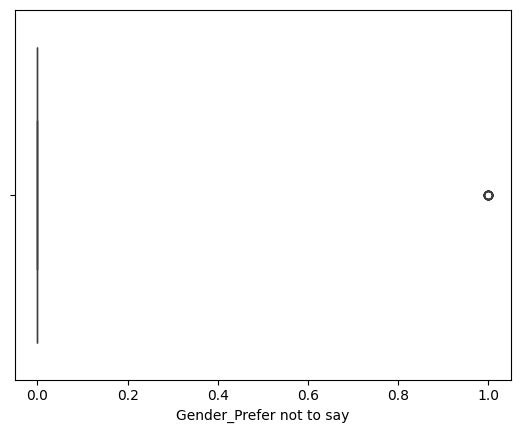

In [16]:
#Boxplot-to-identify outliers

import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [17]:
#outliers removal

#identify numeric columns
numeric_columns = df.select_dtypes(include="number").columns

In [18]:
#compute Q1,Q3 and IQR
Q1=df[numeric_columns].quantile(0.25)
Q3=df[numeric_columns].quantile(0.75)
IQR=Q3-Q1

In [19]:
# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# keep rows where ALL numeric values are within their IQR bounds
df_cleaned = df[
    (df[numeric_columns] >= lower_bound) &
    (df[numeric_columns] <= upper_bound)
].all(axis=1)

In [27]:
# Apply this condition to the all columns
df_cleaned = df[df_cleaned]

In [22]:
print(df_cleaned.shape)

(2358,)


In [28]:
#  Calculate the number of outliers

original_rows = df.shape[0]
cleaned_rows = df_cleaned.shape[0]
outliers_count = original_rows - cleaned_rows

#  Print the result
print(f"Original number of rows: {original_rows}")
print(f"Number of rows after removing outliers: {cleaned_rows}")
print(f"Total number of outliers found and removed: {outliers_count}")


Original number of rows: 2358
Number of rows after removing outliers: 0
Total number of outliers found and removed: 2358


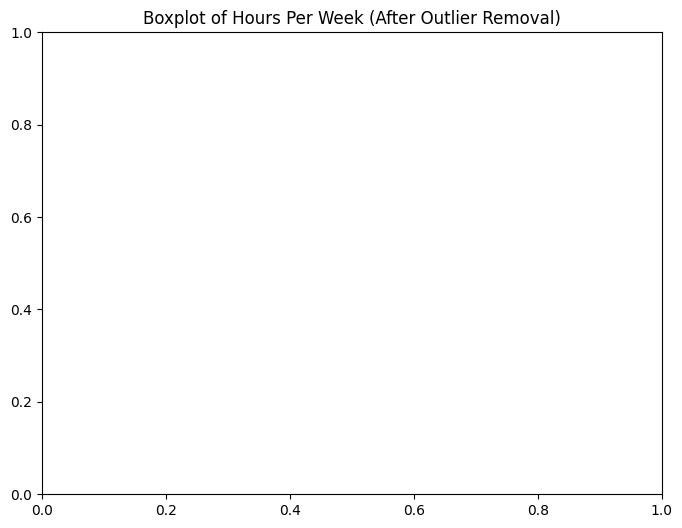

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the cleaned data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Hours_Per_Week'])
plt.title('Boxplot of Hours Per Week (After Outlier Removal)')
plt.show()

In [30]:
print(df_cleaned.shape)

(0, 84)


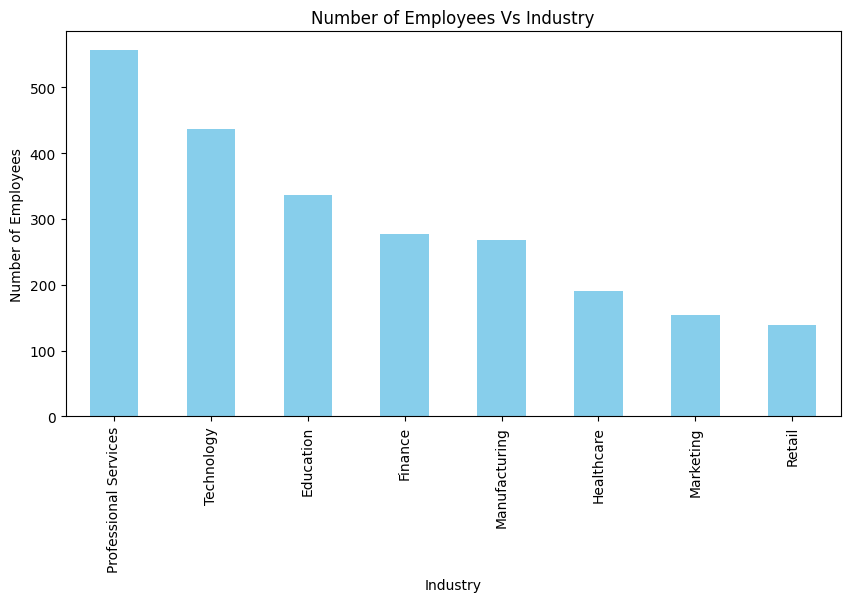

In [34]:
#Histogram
df.Industry.value_counts().nlargest(20).plot(kind='bar',color= 'skyblue', figsize=(10,5))
plt.title("Number of Employees Vs Industry")
plt.ylabel("Number of Employees")
plt.xlabel("Industry")
plt.show()

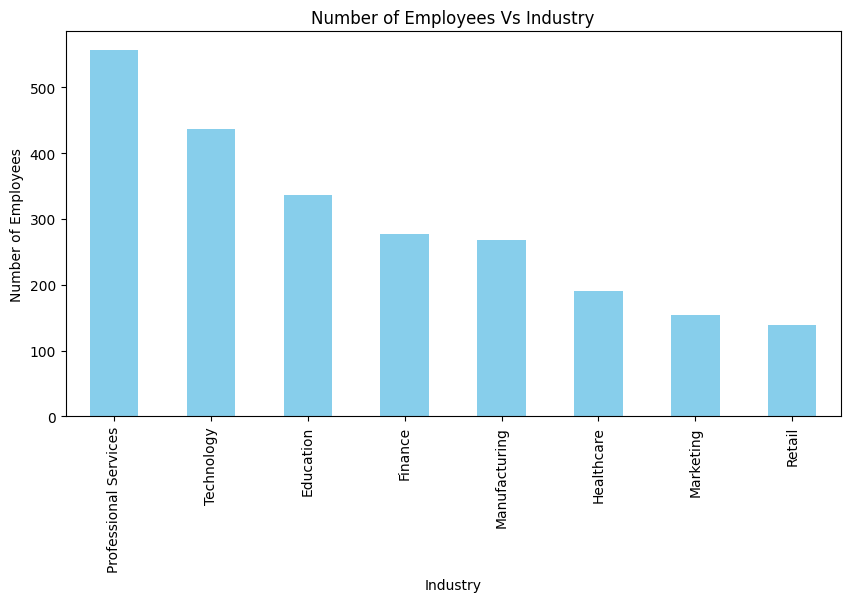

In [32]:
# Create a new 'Industry' column by combining one-hot encoded columns
industry_cols = [col for col in df.columns if col.startswith('Industry_')]
df['Industry'] = df[industry_cols].idxmax(axis=1).str.replace('Industry_', '')

# Histogram
df['Industry'].value_counts().nlargest(20).plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title("Number of Employees Vs Industry")
plt.ylabel("Number of Employees")
plt.xlabel("Industry")
plt.show()

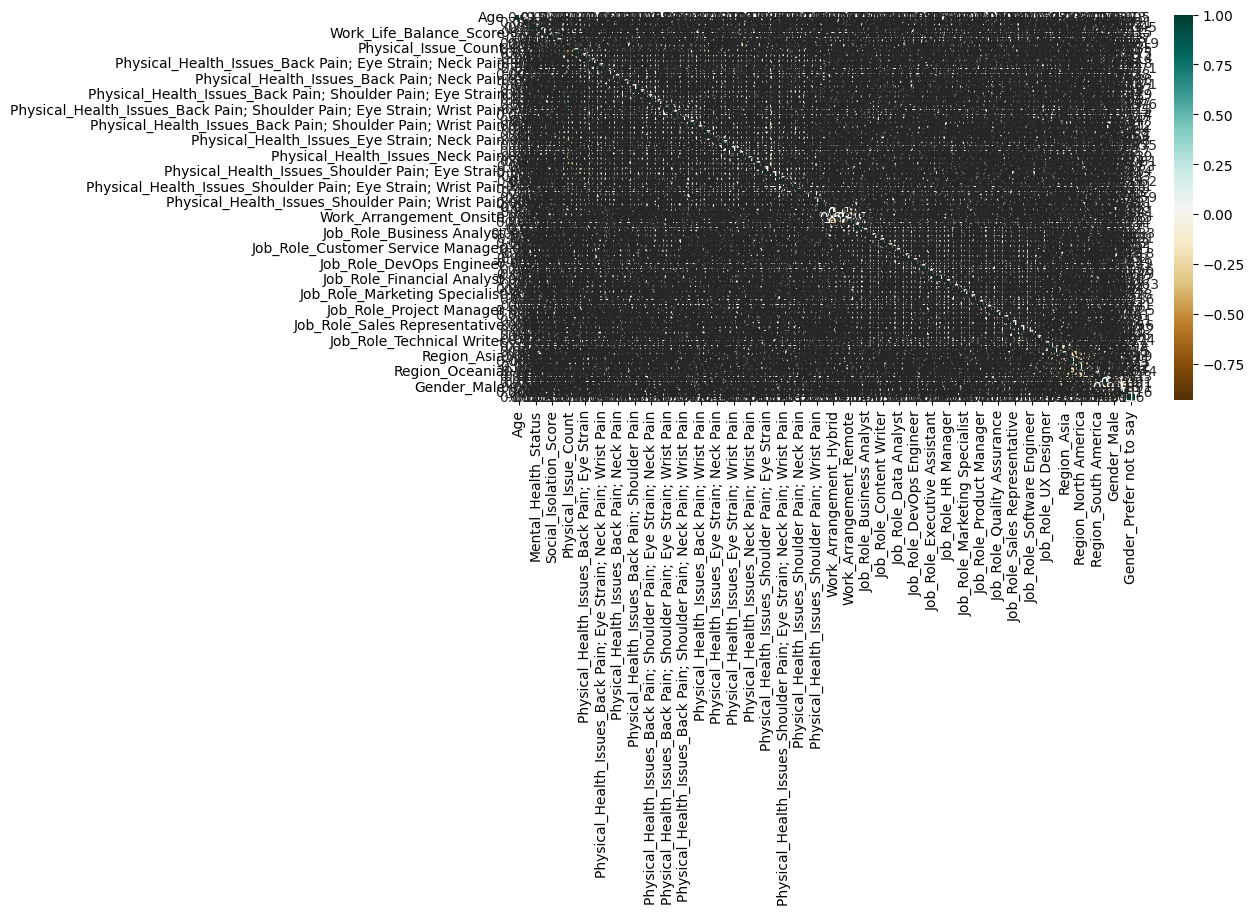

In [33]:
#Heat Maps
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()